# 简介

进程指的是程序的运行过程，程序是一堆代码，当程序运行起来才会有进程。

同一个程序执行两次，是有两个进程。

# 开启子进程的两种方式

方式一：函数式
```python
import time
from multiprocessing import Process
def task(name):
    print("%s is runing"%name)
    time.sleep(3)
    print("%s done"%name)

if __name__ == "__main__":
    # windows的话一定要把开子进程放到这里
    sub_task = Process(target=task, args=('子进程1',))  # 为子进程传递参数的第二种方式 Process(target=task, kwargs={'name': '子进程'})   
    
    # 开启子进程，仅仅只是给操作系统发送了一个信号，告诉操作系统给我开一个进程。
    sub_task.start()
    # 发完信号后，继续执行主线程
    print("主进程")
    
```

输出结果：
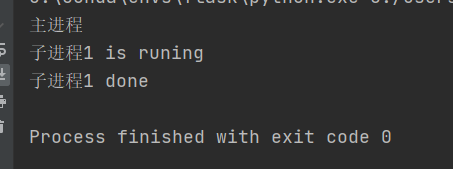

方式二：自定义类的方式实现，重写run方法
```python
import time
from multiprocessing import Process
class MyProcess(Process):
    def __init__(self, name):
        super().__init__()
        self.name = name
        
    def run(self):
        print("%s is runing"%self.name)
        time.sleep(3)
        print("%s done"%self.name)
        
if __name__ == "__main__":
    mp = MyProcess('进程1')
    mp.start()  # 调用的就是mp 的 run方法
    print("主进程")
    

```

# 查看进程的pid和ppid

进程id简称为pid。
父进程的id简称ppid。

使用`os.getpid()`获取当前进程的进程id.`os.getppid()`获取父进程的pid。

```python
import time
import os
from multiprocessing import Process


class MyProcess(Process):
    def __init__(self, name):
        super().__init__()
        self.name = name

    def run(self):
        # os.getpid() 在子进程中，获取的是子进程的pid
        print("%s is running, parent pid %s" % (os.getpid(),os.getppid()))
        time.sleep(3)
        print("%s done" % os.getpid())


if __name__ == "__main__":
    mp = MyProcess('进程1')
    mp.start()
    # os.getpid 在父进程中获取父进程的pid
    print("主进程", os.getpid())

```

执行结果：
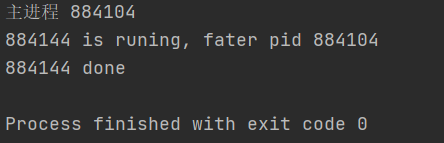

查看主进程的父进程，是pycharm打开运行的这个py文件，所以其父进程是pycharm,在windows下执行`tasklist | findstr pycharm`来查看进程号

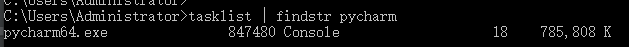

# 僵尸进程和孤儿进程

在linux中所有的子进程都要经历僵尸进程的状态，即子进程运行结束后，并不会完完整整的全部清除掉，会保留一些状态资源在内存中，等待父进程查看。子进程在僵尸进程状态时，所占用的进程id是不会释放的。

僵尸进程的害处是：主进程一直不死，有很多的子进程处于僵尸进程状态，占用进程id，会导致开新子进程时失败。

父进程死了，子进程还再运行，此时子进程就是孤儿进程。在linux中孤儿进程是有init进程来回收。

孤儿进程是无害的。

# 守护进程

主进程创建守护进程：

- 守护进程会在主进程代码执行结束后就终止
- 守护进程内无法再开启子进程,否则抛出异常

创建守护进程：
```python
if __name__ == "__main__":
    p = Process(target=task)
    p.daemon = True   # 开启守护进程  必须是在start之前
    p.start()
    time.sleep(3)
    print("主进程")
```

# Process对象的其他属性或方法

## join方法

主进程代码执行等到子进程代码运行完毕才会执行。基于子进程运行完成的结果再执行主进程。

让主进程一直等待着子进程结束。

```python
p = Process(target=task)
p.join()  # 主进程会阻塞在此处，等子进程结束，才会往下执行。
print("主进程")
```

## pid 属性

在父进程中拿到子进程的进程id

```python
p = Process(target=task)
p.join()  # 等子进程结束，才会往下执行。
print("主进程")
print(p.pid)  # 说明子进程结束后，有些状态没有释放
```

创建多个子进程，调用start()方法时，不是调用顺序开启子进程的，start()只是发送一个信号通知操作系统帮忙开一个子进程，具体开启子进程的顺序要看操作系统。

## name属性

`p.name` 查看进程的名字

在创建子进程对象的时候可以设置进程名字：`p = Process(target=task, name='sub_process_1')`

# is_alive() 方法

查看子进程是活着还是死的`p.is_alive()`,返回bool值。

## terminate()方法

手动杀死开启的子进程，`p.terminate()`,只是给操作系统发送一个信号，让操作系统去杀掉这个进程。

```python
if __name__ == "__main__":
    mp = MyProcess('进程1')
    mp.start()
    print(mp.is_alive())
    mp.terminate()
    print(mp.is_alive())  # 此时返回结果是True，因为杀死子进程是操作系统来干的，不知道要多长时间，所以在此处子进程还存活
    print("主进程", os.getpid(), "主进程的父进程",os.getppid())
```

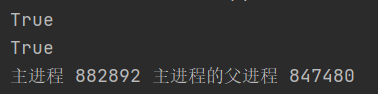

# 进程池

与线程池的使用方法一模一样

In [ ]:
from concurrent.futures import ProcessPoolExecutor

with ProcessPoolExecutor(4) as p:
    p.submit(work, 参数)

# 进程与线程

进程： 单独的，独立的程序

线程： 用多线程，可以让一个程序变的高效。

只是想提升当前程序的效率的话，使用多线程。多进程，多个任务给不同进程处理。